In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

scaler = StandardScaler()

In [2]:
# read in the boston data
boston = load_boston()

# create X (features) and y (response)
X = boston.data
y = boston.target

In [3]:
X_scaled = scaler.fit_transform(X)

Сделаем 20 train_test_split и обучим на них линейную регрессию

In [4]:
for i in range(20):
    X_tr, X_ts, y_tr, y_ts = train_test_split(X_scaled,y)
    LinReg = linear_model.Ridge(alpha=.5)
    LinReg.fit(X_tr, y_tr)
    print(LinReg.score(X_ts,y_ts))

0.6313517698182836
0.7665411962761505
0.7069548490037507
0.7952211104165686
0.5524174631276202
0.7211888011101624
0.6797621822890589
0.7747717043605336
0.6766326577596451
0.7025022682551472
0.7045237489761564
0.7152924523095854
0.6957132836451716
0.7372514678026695
0.6942017347750398
0.7082767671851242
0.6982654756006619
0.7802034703174175
0.7643831562932338
0.7570002236602128


Сделаем cross_val_score для линейной регрессии

In [5]:
LinReg = linear_model.Ridge(alpha=.5)

In [6]:
scores = cross_val_score(LinReg, X_scaled, y, cv = 15, scoring = 'r2')

In [7]:
print(scores)

[ 0.70287233  0.61563019  0.54506132 -0.39637516  0.70863892  0.56943636
  0.59534301  0.72436293  0.71834026  0.29708026 -0.61405258 -3.77013277
 -0.272625    0.17900129  0.44657987]


In [8]:
print(scores.mean())

0.06994408143131806


GridSerch CV

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
# define the parameter values that should be searched
n_alpha = list(range(100,131))
print(n_alpha)

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]


In [11]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(alpha = n_alpha)
print(param_grid)

{'alpha': [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]}


In [12]:
# instantiate the grid
grid = GridSearchCV(LinReg, param_grid, cv=10, scoring='r2')

Полученный объект будет перебирать параметр appha регрессии Ridge, делать кросс-валидацию и оценивать качество, используя accuracy в качестве метрики

In [13]:
# fit the grid with data
grid.fit(X_scaled, y)

GridSearchCV(cv=10, estimator=Ridge(alpha=0.5),
             param_grid={'alpha': [100, 101, 102, 103, 104, 105, 106, 107, 108,
                                   109, 110, 111, 112, 113, 114, 115, 116, 117,
                                   118, 119, 120, 121, 122, 123, 124, 125, 126,
                                   127, 128, 129, ...]},
             scoring='r2')

In [14]:
# view the complete results (list of named tuples)
for k in grid.cv_results_:
    print(k, ":", grid.cv_results_[k][0])

mean_fit_time : 0.00034148693084716796
std_fit_time : 0.00011727843834195321
mean_score_time : 0.0001714944839477539
std_score_time : 1.6486106010069695e-05
param_alpha : 100
params : {'alpha': 100}
split0_test_score : 0.7687998902500116
split1_test_score : 0.6105136297340357
split2_test_score : -0.005370365651535813
split3_test_score : 0.5343455284815981
split4_test_score : 0.5818305740565478
split5_test_score : 0.6553488718519493
split6_test_score : 0.3919504706334689
split7_test_score : 0.08527761367819064
split8_test_score : -0.5993597989395074
split9_test_score : 0.5431660821727619
mean_test_score : 0.35665024962675207
std_test_score : 0.39503267046707347
rank_test_score : 26


In [15]:
# create a list of the mean scores only
test_scores = grid.cv_results_['mean_test_score']
print(test_scores)

[0.35665025 0.35674133 0.35682382 0.3568979  0.35696375 0.35702153
 0.35707142 0.35711357 0.35714816 0.35717532 0.35719521 0.35720798
 0.35721377 0.35721272 0.35720496 0.35719063 0.35716986 0.35714276
 0.35710947 0.3570701  0.35702477 0.3569736  0.35691669 0.35685415
 0.35678609 0.35671261 0.35663382 0.3565498  0.35646067 0.3563665
 0.35626741]


Text(0, 0.5, 'Cross-Validated Accuracy')

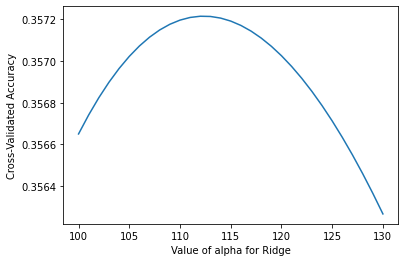

In [16]:
# plot the results
# this is identical to the one we generated above
plt.plot(n_alpha, test_scores)
plt.xlabel('Value of alpha for Ridge')
plt.ylabel('Cross-Validated Accuracy')

In [17]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.3572137727709621
{'alpha': 112}
Ridge(alpha=112)


Randomized SearchCV

In [18]:
from sklearn.model_selection import RandomizedSearchCV

In [19]:
# define the parameter values that should be searched
n_alpha = list(range(100,131))
print(n_alpha)

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]


In [20]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(alpha = n_alpha)
print(param_grid)

{'alpha': [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]}


In [21]:
# instantiate the grid
grid = RandomizedSearchCV(LinReg, param_grid, cv=10, scoring='r2')

In [22]:
# fit the grid with data
grid.fit(X_scaled, y)

RandomizedSearchCV(cv=10, estimator=Ridge(alpha=0.5),
                   param_distributions={'alpha': [100, 101, 102, 103, 104, 105,
                                                  106, 107, 108, 109, 110, 111,
                                                  112, 113, 114, 115, 116, 117,
                                                  118, 119, 120, 121, 122, 123,
                                                  124, 125, 126, 127, 128, 129, ...]},
                   scoring='r2')

In [23]:
# view the complete results (list of named tuples)
for k in grid.cv_results_:
    print(k, ":", grid.cv_results_[k][0])

mean_fit_time : 0.0003200054168701172
std_fit_time : 8.66905034965372e-05
mean_score_time : 0.00016570091247558594
std_score_time : 1.3116055917856914e-05
param_alpha : 111
params : {'alpha': 111}
split0_test_score : 0.7641908778250298
split1_test_score : 0.6121779575017892
split2_test_score : 0.019728145505336303
split3_test_score : 0.5236483859916343
split4_test_score : 0.5791029385097995
split5_test_score : 0.6442962238649097
split6_test_score : 0.3790410207897217
split7_test_score : 0.09530465025763679
split8_test_score : -0.5901561357837242
split9_test_score : 0.5447457647460187
mean_test_score : 0.35720798292081524
std_test_score : 0.38802526628383555
rank_test_score : 1


In [24]:
# create a list of the mean scores only
test_scores = grid.cv_results_['mean_test_score']
print(test_scores)

[0.35720798 0.35674133 0.35626741 0.35691669 0.3568979  0.35696375
 0.35678609 0.35685415 0.3563665  0.35711357]


In [25]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.35720798292081524
{'alpha': 111}
Ridge(alpha=111)


Видим, что RandomizedSearchCV и GridSearchCV дали похожие результаты для значения alpha 114 и 112

OOB Score

In [26]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.2)

In [28]:
regressor = RandomForestRegressor(oob_score=True, n_estimators=20, max_depth=5)

In [29]:
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=20, oob_score=True)

In [30]:
print(regressor.oob_score_)
print(regressor.score(X_valid,y_valid))

0.8287444335695895
0.870766975946211
